# Cargar datos usando numpy y tensorflow para un dataset

In [2]:
import tensorflow as tf

import functools

import numpy as np

import pandas as pd

In [3]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

La función `tf.keras.utils.get_file` es una utilidad en TensorFlow que se utiliza para descargar un archivo desde una URL dada. También tiene la opción de almacenar en caché el archivo, por lo que si ya has descargado el archivo antes, la función lo recuperará de la caché en lugar de descargarlo de nuevo.



In [4]:
np.set_printoptions(precision=3, suppress=True) #Nos permite hacer que los valores sean mas agradables para leer

La función `np.set_printoptions` de NumPy se utiliza para establecer opciones de visualización para la salida de los arrays de NumPy.

En tu caso, `np.set_printoptions(precision=3, suppress=True)` hace lo siguiente:

- `precision=3`: Esto establece la precisión de la salida flotante a 3 lugares decimales. Por ejemplo, un número como 0.123456 se imprimirá como 0.123.

- `suppress=True`: Esto, cuando se establece en True, suprime el uso de la notación científica para números pequeños. Es decir, si tienes números muy pequeños en tu array que se imprimirían normalmente en notación científica (por ejemplo, 1.23e-4), en su lugar se imprimirán como números decimales (0.000123).

In [5]:
#Asi podriamos verlo mejor en un dataframe de pandas

train_Dataframe = pd.read_csv(train_file_path)

test_Dataframe=pd.read_csv(test_file_path)

train_Dataframe.head(320)


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
315,1,female,14.0,1,2,120.0000,First,B,Southampton,n
316,1,female,24.0,2,3,18.7500,Second,unknown,Southampton,n
317,0,male,64.0,1,4,263.0000,First,C,Southampton,n
318,0,male,31.0,0,0,10.5000,Second,unknown,Southampton,y


In [6]:
test_Dataframe

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y
...,...,...,...,...,...,...,...,...,...,...
259,1,female,25.0,0,1,26.0000,Second,unknown,Southampton,n
260,0,male,33.0,0,0,7.8958,Third,unknown,Southampton,y
261,0,female,39.0,0,5,29.1250,Third,unknown,Queenstown,n
262,0,male,27.0,0,0,13.0000,Second,unknown,Southampton,y


In [7]:
# Carga el archivo CSV en un tf.data.Dataset
dataset = tf.data.experimental.make_csv_dataset(
    train_file_path,
    batch_size=5, # Ajusta esto según tus necesidades
    na_value="unknown",
    num_epochs=1,
    ignore_errors=True)

# Convierte el tf.data.Dataset en un DataFrame de pandas
dataframe = pd.DataFrame(dataset)

dataframe

Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,"(tf.Tensor(1, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(b'female', shape=(), dtype=string),...","(tf.Tensor(27.0, shape=(), dtype=float32), tf....","(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(7.925, shape=(), dtype=float32), tf...","(tf.Tensor(b'Third', shape=(), dtype=string), ...","(tf.Tensor(b'', shape=(), dtype=string), tf.Te...","(tf.Tensor(b'Southampton', shape=(), dtype=str...","(tf.Tensor(b'y', shape=(), dtype=string), tf.T..."
1,"(tf.Tensor(1, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(b'male', shape=(), dtype=string), t...","(tf.Tensor(19.0, shape=(), dtype=float32), tf....","(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(10.5, shape=(), dtype=float32), tf....","(tf.Tensor(b'Second', shape=(), dtype=string),...","(tf.Tensor(b'', shape=(), dtype=string), tf.Te...","(tf.Tensor(b'Southampton', shape=(), dtype=str...","(tf.Tensor(b'y', shape=(), dtype=string), tf.T..."
2,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(b'male', shape=(), dtype=string), t...","(tf.Tensor(33.0, shape=(), dtype=float32), tf....","(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(9.5, shape=(), dtype=float32), tf.T...","(tf.Tensor(b'Third', shape=(), dtype=string), ...","(tf.Tensor(b'', shape=(), dtype=string), tf.Te...","(tf.Tensor(b'Southampton', shape=(), dtype=str...","(tf.Tensor(b'y', shape=(), dtype=string), tf.T..."
3,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(b'male', shape=(), dtype=string), t...","(tf.Tensor(28.0, shape=(), dtype=float32), tf....","(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(26.55, shape=(), dtype=float32), tf...","(tf.Tensor(b'First', shape=(), dtype=string), ...","(tf.Tensor(b'C', shape=(), dtype=string), tf.T...","(tf.Tensor(b'Southampton', shape=(), dtype=str...","(tf.Tensor(b'y', shape=(), dtype=string), tf.T..."
4,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(b'male', shape=(), dtype=string), t...","(tf.Tensor(15.0, shape=(), dtype=float32), tf....","(tf.Tensor(1, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(1, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(7.2292, shape=(), dtype=float32), t...","(tf.Tensor(b'Third', shape=(), dtype=string), ...","(tf.Tensor(b'', shape=(), dtype=string), tf.Te...","(tf.Tensor(b'Cherbourg', shape=(), dtype=strin...","(tf.Tensor(b'n', shape=(), dtype=string), tf.T..."
...,...,...,...,...,...,...,...,...,...,...
121,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(b'male', shape=(), dtype=string), t...","(tf.Tensor(47.0, shape=(), dtype=float32), tf....","(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(34.0208, shape=(), dtype=float32), ...","(tf.Tensor(b'First', shape=(), dtype=string), ...","(tf.Tensor(b'D', shape=(), dtype=string), tf.T...","(tf.Tensor(b'Southampton', shape=(), dtype=str...","(tf.Tensor(b'y', shape=(), dtype=string), tf.T..."
122,"(tf.Tensor(1, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(b'male', shape=(), dtype=string), t...","(tf.Tensor(62.0, shape=(), dtype=float32), tf....","(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(10.5, shape=(), dtype=float32), tf....","(tf.Tensor(b'Second', shape=(), dtype=string),...","(tf.Tensor(b'', shape=(), dtype=string), tf.Te...","(tf.Tensor(b'Southampton', shape=(), dtype=str...","(tf.Tensor(b'y', shape=(), dtype=string), tf.T..."
123,"(tf.Tensor(1, shape=(), dtype=int32), tf.Tenso...","(tf.Tensor(b'male', shape=(), dtype=string), t...","(tf.Tensor(51.0, shape=(), dtype=float32), tf....","(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso...","(tf.Tens

La función `tf.data.experimental.make_csv_dataset` se utiliza para leer archivos CSV y convertirlos en un `tf.data.Dataset`. Aquí está lo que hacen los parámetros que se pasan a esta función:

- `train_file_path`: Esta es la ruta al archivo CSV que quieres cargar. En este caso, es la ruta al archivo de datos de entrenamiento del Titanic.

- `batch_size`: Este es el número de filas del CSV que se leerán a la vez. Esto puede ser ajustado para optimizar el rendimiento de lectura.

- `na_value`: Este es el valor que se utilizará para rellenar cualquier valor faltante en el CSV. En este caso, cualquier valor faltante se rellenará con "?".

- `num_epochs`: Este es el número de veces que el dataset se iterará. Un valor de 1 significa que el dataset se leerá una vez.

- `ignore_errors`: Si se establece en True, la función ignorará cualquier error de lectura y continuará.

Después de cargar el CSV en un `tf.data.Dataset`, el código convierte el dataset en un DataFrame de pandas y luego lo imprime.

In [8]:
#Ahora vamos a convertirlo en un dataset de tensorflow para poder trabajar con el que usa tensores

def get_dataset(file_path, select_columns=None, column_defaults=None):
    if select_columns is None or column_defaults is None:
        dataset = tf.data.experimental.make_csv_dataset(
            file_path,
            batch_size=5,
            na_value="unknown",
            num_epochs=1,
        )
    else:
        dataset = tf.data.experimental.make_csv_dataset(
            file_path,
            batch_size=5,
            na_value="unknown",
            num_epochs=1,
            select_columns=select_columns,
            column_defaults=column_defaults,
        )
    return dataset
 

raw_train_data = get_dataset(train_file_path)

raw_test_data =  get_dataset(test_file_path)

In [9]:
type(raw_train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [10]:
def show_batch(dataset):
  for batch in dataset.take(1):
    for key, value in batch.items():
      print("{:20s}: {}".format(key,value.numpy()))

show_batch(raw_train_data)


survived            : [1 0 1 1 0]
sex                 : [b'female' b'male' b'female' b'female' b'male']
age                 : [32.5 36.  36.  15.  25. ]
n_siblings_spouses  : [0 0 1 0 1]
parch               : [0 0 0 0 0]
fare                : [13.    13.    17.4    7.225 26.   ]
class               : [b'Second' b'Second' b'Third' b'Third' b'Second']
deck                : [b'E' b'' b'' b'' b'']
embark_town         : [b'Southampton' b'Southampton' b'Southampton' b'Cherbourg' b'Southampton']
alone               : [b'y' b'y' b'n' b'y' b'n']


La función `show_batch(dataset)` se utiliza para imprimir los contenidos de un lote de datos de un `tf.data.Dataset`. Aquí está lo que hace cada línea:

- `for batch in dataset.take(1):` Esto toma un lote del dataset. `dataset.take(1)` toma un lote de datos del dataset. Cada lote es un diccionario de características en este caso un grupo 5 personas que es lo que tensor dataset definio anteriormente.

- `for key, value in batch.items():` Esto itera sobre cada elemento en el lote. Cada elemento es un par de `(key, value)`, donde `key` es el nombre de la característica y `value` es un tensor que contiene los valores de esa característica para todas las instancias en el lote.

- `print("{:20s}: {}".format(key,value.numpy()))` Esto imprime el nombre de la característica y sus valores. `value.numpy()` se utiliza para convertir el tensor de valores en un array de NumPy para su impresión.



# Preprocesar los datos


El preprocesamiento de datos es un paso crucial en el análisis de datos y en el aprendizaje automático. Aquí te dejo algunas razones por las que se realiza el preprocesamiento de datos:

1. **Limpieza de datos**: Los datos pueden contener errores, valores faltantes, o datos irrelevantes. El preprocesamiento ayuda a limpiar estos datos para que no afecten negativamente a los resultados del análisis.

2. **Normalización y escalado**: Los datos pueden contener características que están en diferentes escalas. Por ejemplo, la edad puede variar de 0 a 100, mientras que el ingreso puede variar de 0 a 100,000. El preprocesamiento puede ayudar a escalar estas características para que estén en el mismo rango, lo cual es importante para muchos algoritmos de aprendizaje automático.

3. **Codificación de variables categóricas**: Muchos algoritmos de aprendizaje automático requieren que las entradas sean numéricas. Si tus datos contienen variables categóricas (como "hombre" y "mujer" para el género), el preprocesamiento puede convertir estas variables en una forma numérica.

4. **Reducción de la dimensionalidad**: Los datos pueden contener muchas características, algunas de las cuales pueden no ser útiles para el análisis. El preprocesamiento puede ayudar a reducir la cantidad de características a las más importantes, lo que puede hacer que el análisis sea más eficiente y preciso.

En resumen, el preprocesamiento de datos ayuda a preparar los datos para el análisis, lo que puede mejorar la calidad y la eficiencia de los resultados del análisis.

Si los datos ya tienen un formato numérico adecuado, puede empaquetarlos en un vector antes de pasarlos al modelo:




In [11]:
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'parch', 'fare'] #Las columnas que se van a preprocesar

#Los valores por defecto de las columnas
DEFAULTS = [0, 0.0, 0.0, 0.0, 0.0]

temp_dataset = get_dataset(train_file_path, 
                           select_columns=SELECT_COLUMNS,
                           column_defaults=DEFAULTS)


show_batch(temp_dataset)



survived            : [0 1 0 1 0]
age                 : [28. 40. 28. 14. 36.]
n_siblings_spouses  : [1. 0. 0. 1. 0.]
parch               : [0. 0. 1. 2. 0.]
fare                : [ 15.5  31.   33.  120.   10.5]


In [12]:
train_Dataframe.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


# Normalizar los datos

In [13]:
#Como tiene algunas filas que son texto , procedemos a solo tomar aquellas que tienen valores numericos y se les sacara su media y desviacion estandar

numeric_Features=train_Dataframe.select_dtypes(include=["float64","int64"])

mean=list(numeric_Features.mean())

std=list(numeric_Features.std())


print(mean,std)

[0.3875598086124402, 29.631307814992027, 0.5454545454545454, 0.379585326953748, 34.38539856459331] [0.4875821656114255, 12.511817629565815, 1.1510895973422302, 0.7929992125432798, 54.5977304994563]


In [14]:
def normalize_numeric_data(data, mean, std):

    return (data-mean)/std

La función `normalize_numeric_data(data, mean, std)` realiza una normalización de los datos numéricos, que es un paso común en el preprocesamiento de los datos para muchos algoritmos de aprendizaje automático.

La normalización cambia los valores numéricos en los datos a una escala común, sin distorsionar las diferencias en los rangos de valores o perder información.

Aquí está lo que hace cada parte de la función:

- `data`: Este es el conjunto de datos numéricos que quieres normalizar.

- `mean`: Este es el valor medio de los datos. Se resta de cada valor en los datos para centrar los datos alrededor de 0.

- `std`: Esta es la desviación estándar de los datos. Se utiliza para escalar los datos. Cada valor en los datos se divide por la desviación estándar para completar el proceso de normalización.

- `return (data-mean)/std`: Esta línea de código realiza la normalización. Primero, resta el valor medio de cada valor en los datos para centrar los datos alrededor de 0. Luego, divide cada valor por la desviación estándar para escalar los datos.

El resultado es un conjunto de datos donde todos los valores tienen una media de 0 y una desviación estándar de 1. Esto puede hacer que el algoritmo de aprendizaje automático sea más eficiente y mejore su rendimiento.

# Cargar imagenes usando TENSORFLOW
Esto es realmente util para ciertos modelos en donde los datos de alimentacion son imagenes y no datos numericos planos

In [15]:
# Liberias necesarias para la visualizacion de imagenes

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf


In [16]:
# Un objeto autotune que me permite hacer que el programa se ejecute mas rapido y regular los recursos de la maquina

AUTOTUNE = tf.data.experimental.AUTOTUNE

In [17]:
import pathlib

data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True) #Aqui se descargan las imagenes de flores y se indica la ruta

data_dir = pathlib.Path(data_dir) #Se convierte en un objeto de tipo path para poder trabajar con el , recommendable para trabajar con archivos y el SO

#Se obtienen las imagenes de la carpeta usando la api de tensorflow de imagenes de flores

228813984/228813984 [==============================] - 7s 0us/step


In [18]:
#Obtiene las las etiquetas de las carpetas de las imagenes 
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
      dtype='<U10')

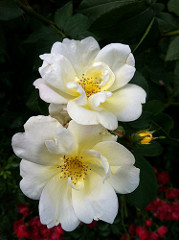

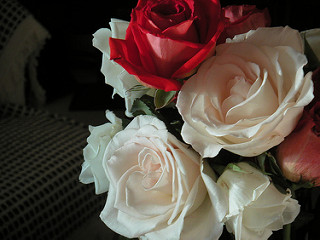

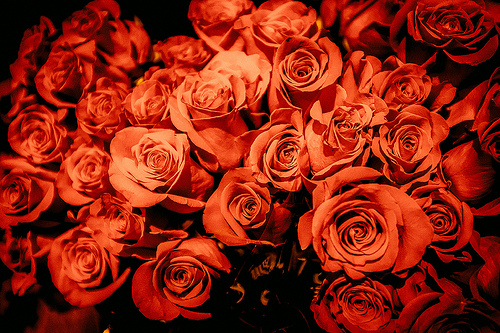

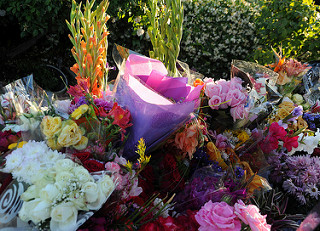

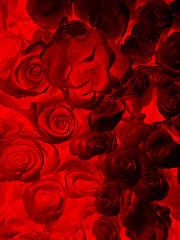

In [23]:
#Obtenemos una cantidad n de imagenes de un tipo en especifico
roses = list(data_dir.glob('roses/*'))

for image_path in roses[:5]:
    display.display(Image.open(str(image_path)))

https://91ef5ed78cfc599-dot-us-central1.notebooks.googleusercontent.com/lab/tree/training-data-analyst/courses/machine_learning/deepdive2/introduction_to_tensorflow/labs/load_images_tf.data.ipynb